# USA HOUSING

## Importación de las librerias

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
print('Setup complete')

Setup complete


## Creación del dataset

In [83]:
df_housing = pd.read_csv('data/USA_Housing.csv')

**INFORMACIÓN DEL DATASET**

In [84]:
round(df_housing.describe(), 2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [85]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**ELIMINACIÓN DE VALORES NULOS Y DUPLICADOS**

In [86]:
nulos = df_housing.isna().sum()
nulos

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [87]:
duplicate_sum = df_housing.duplicated().sum()
if duplicate_sum > 0:
  print('Total de duplicados:', duplicate_sum)
else:
  print('No se encontraron duplicados')

No se encontraron duplicados


Como podemos observar, no se necesita una limpieza de datos nulos ni duplicados. A través d este análisis hemos obtenido como resultado que no hay ninguno.

## Gráficación general de los datos

Primeramente para tener una primera visualización de los datos, realizaremos unas gráficas generales de todos los datos almacenados.

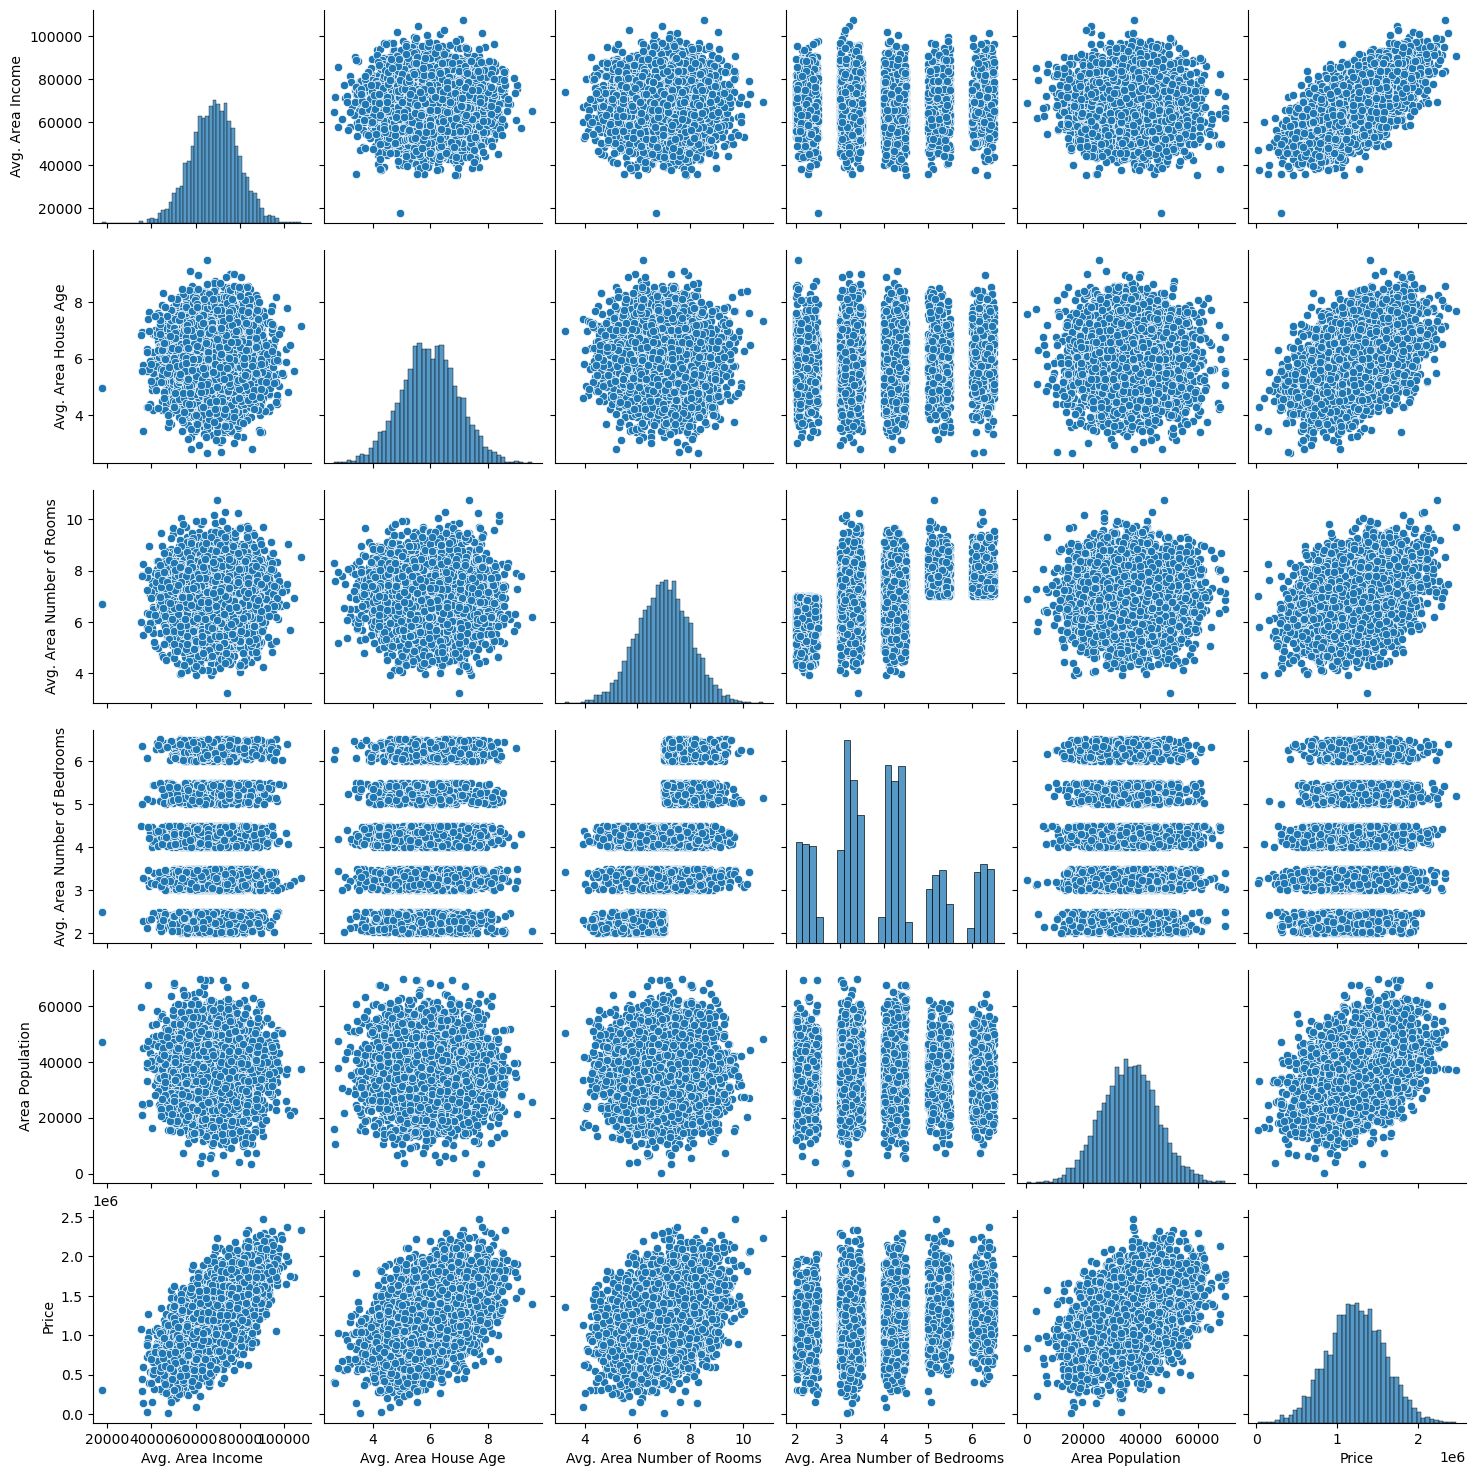

In [88]:
sns.pairplot(df_housing)
plt.savefig('gráficas/pairplot.png')
plt.show()

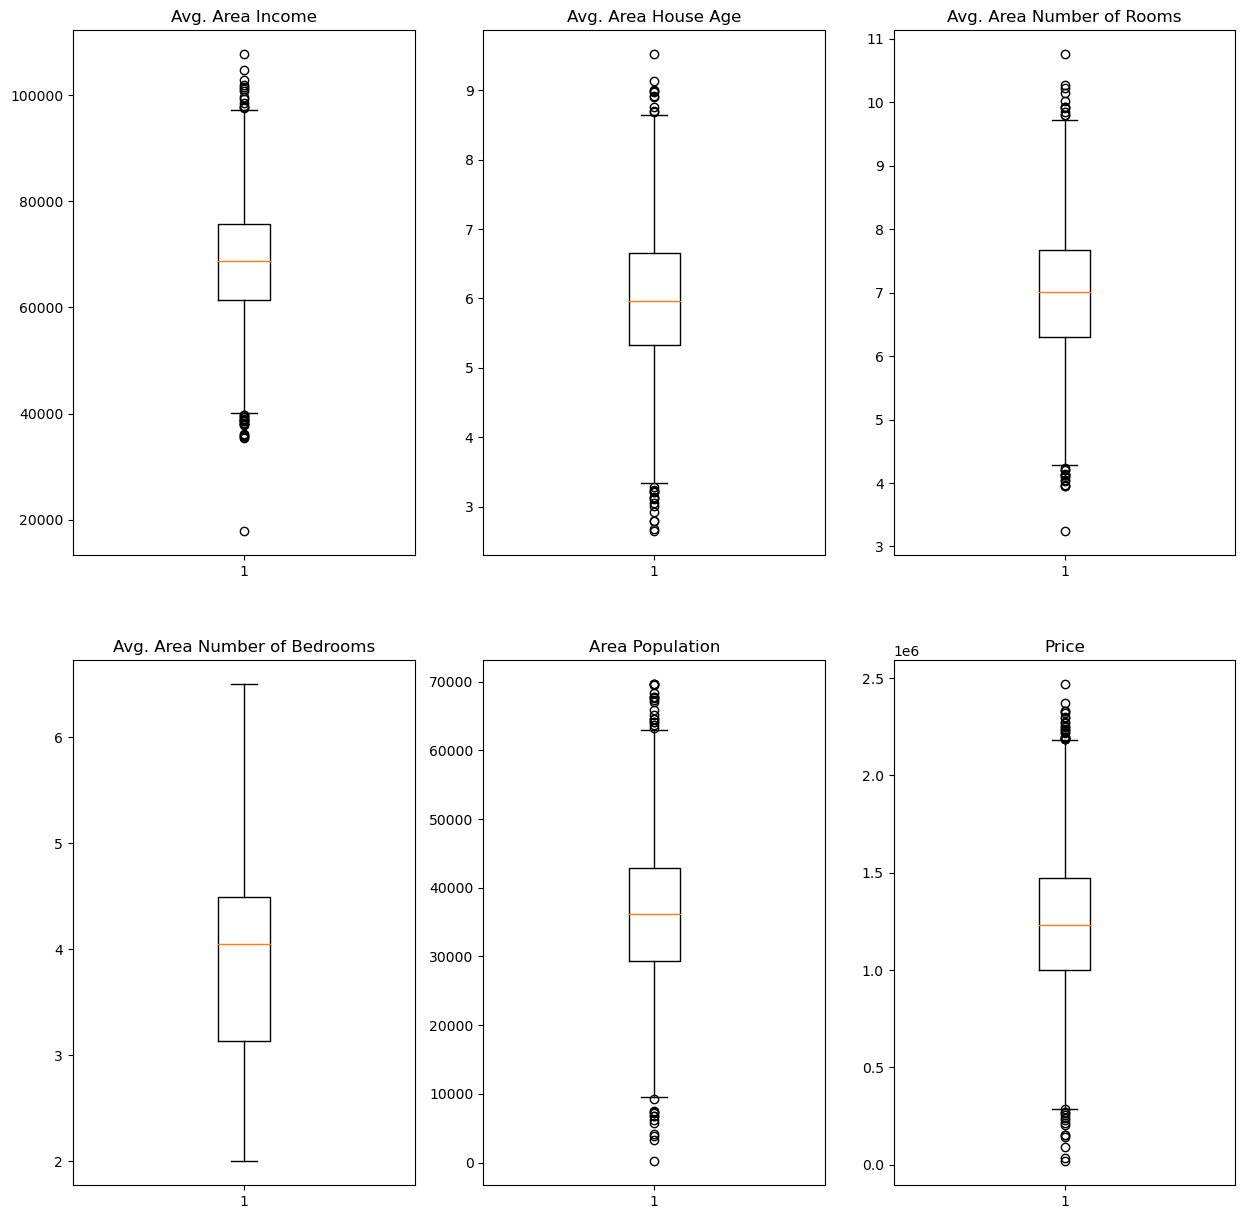

In [89]:
fig, ax = plt.subplots(2,3, figsize=(15,15))
ax[0,0].boxplot(df_housing['Avg. Area Income'])
ax[0,0].set_title('Avg. Area Income')
ax[0,1].boxplot(df_housing['Avg. Area House Age'])
ax[0,1].set_title('Avg. Area House Age')
ax[0,2].boxplot(df_housing['Avg. Area Number of Rooms'])
ax[0,2].set_title('Avg. Area Number of Rooms')
ax[1,0].boxplot(df_housing['Avg. Area Number of Bedrooms'])
ax[1,0].set_title('Avg. Area Number of Bedrooms')
ax[1,1].boxplot(df_housing['Area Population'])
ax[1,1].set_title('Area Population')
ax[1,2].boxplot(df_housing['Price'])
ax[1,2].set_title('Price')

# No incluimos la columna 'Address' porque es de tipo object

plt.savefig('gráficas/boxplot.png')
plt.show()


## Valores atípicos

A partir del diagrama anterior podemos observar que se encuentran datos con valores atípicos, por tanto los eliminaremos.

CÁLCULO DE LOS CUARTILES

In [90]:
Q1 = df_housing.quantile(0.25)
Q3 = df_housing.quantile(0.75)
IQR = Q3 - Q1

LÍMITES PARA DETECCIÓN DE LOS VALORES ATÍPICOS

In [91]:
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

outliers = ((df_housing < limite_inferior) | (df_housing > limite_superior)).any(axis=1) #VALORES ATÍPICOS



C:\Users\mgonzgarc\AppData\Local\Temp\ipykernel_9376\1223007019.py:4: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



A continuación eliminamos los valores atípicos.

In [92]:
df_housing_f1 = df_housing.drop(df_housing[outliers].index)

print("Tamaño del dataset original:", df_housing.shape)
print("Tamaño del dataset sin valores atípicos:", df_housing_f1.shape)
print('Se eliminaron', df_housing.shape[0] - df_housing_f1.shape[0], 'filas')

Tamaño del dataset original: (5000, 7)
Tamaño del dataset sin valores atípicos: (4865, 7)
Se eliminaron 135 filas


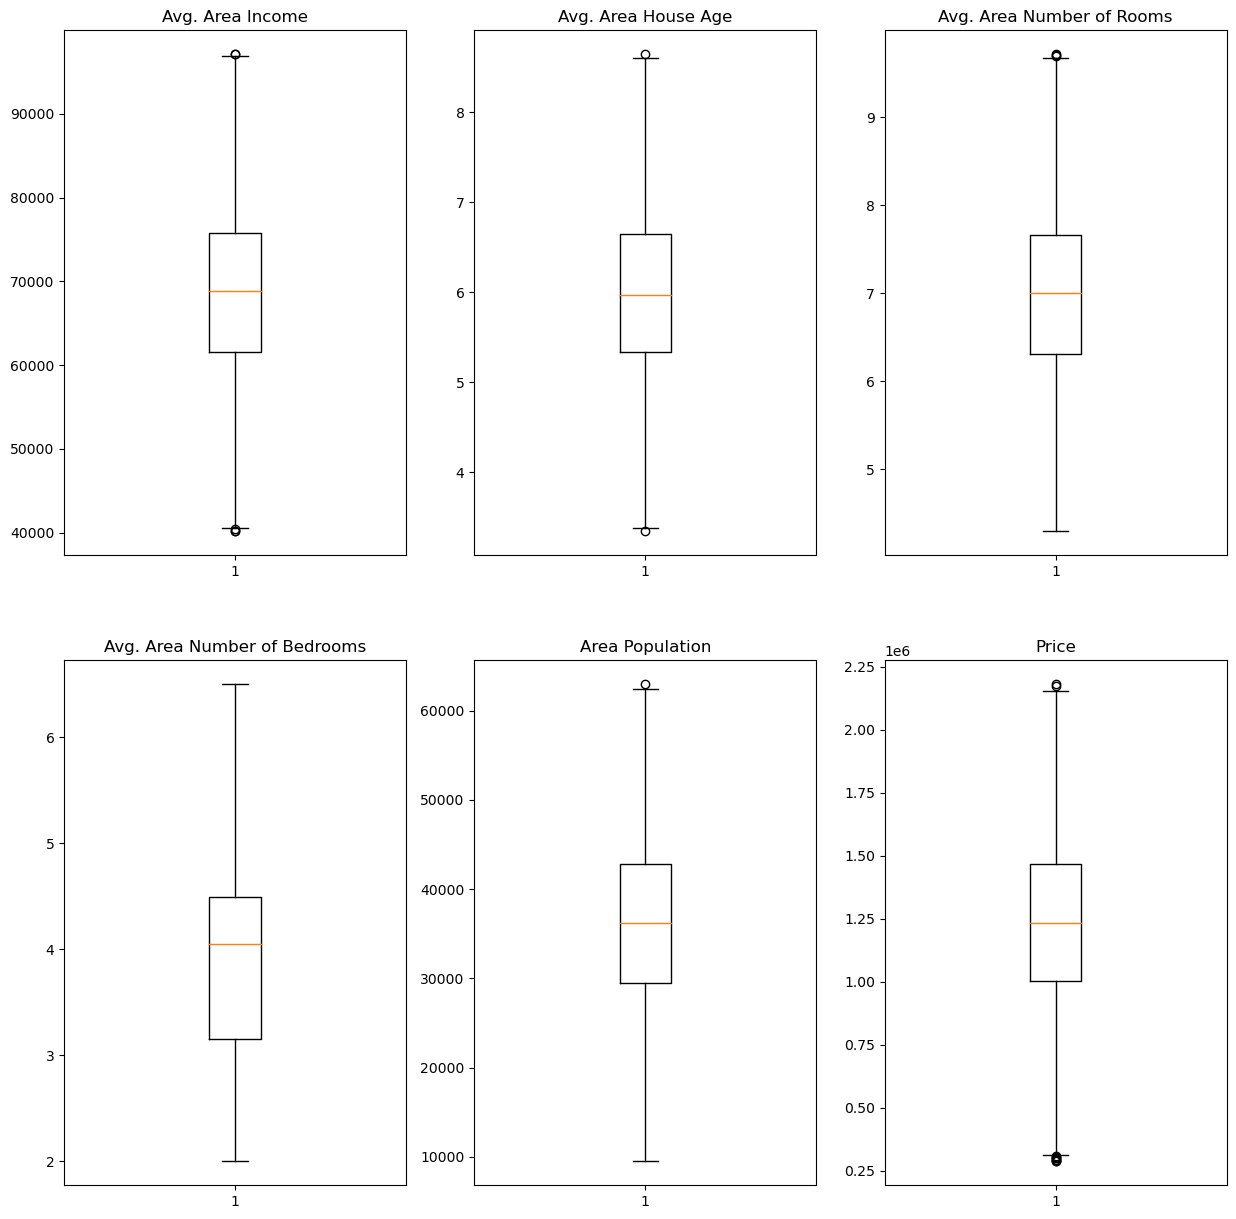

In [93]:
fig, ax = plt.subplots(2,3, figsize=(15,15))
ax[0,0].boxplot(df_housing_f1['Avg. Area Income'])
ax[0,0].set_title('Avg. Area Income')
ax[0,1].boxplot(df_housing_f1['Avg. Area House Age'])
ax[0,1].set_title('Avg. Area House Age')
ax[0,2].boxplot(df_housing_f1['Avg. Area Number of Rooms'])
ax[0,2].set_title('Avg. Area Number of Rooms')
ax[1,0].boxplot(df_housing_f1['Avg. Area Number of Bedrooms'])
ax[1,0].set_title('Avg. Area Number of Bedrooms')
ax[1,1].boxplot(df_housing_f1['Area Population'])
ax[1,1].set_title('Area Population')
ax[1,2].boxplot(df_housing_f1['Price'])
ax[1,2].set_title('Price')

# No incluimos la columna 'Address' porque es de tipo object

plt.savefig('gráficas/boxplot-clean.png')
plt.show()

## PCA

A continuación, se realiza PCA (Análisis de componentes principales). Se trata de una técnica utilizada para reducir la fimesionalidad de un conjunto agrupado de datos. Su objetivo principal es reducir la complejidad de los datos. Frecuentemente se debe de estandarizar los datos para que tengan media 0 y desviación estándar de 1, evitando que las variables con escalas diferentes dominen la variabilidad total y afecten los resultados del análisis.

In [94]:
features = df_housing_f1.drop(['Price', 'Address'], axis=1)
target = df_housing_f1['Price']

In [95]:
scaled_data = StandardScaler().fit_transform(features) #ESTANDARIZACIÓN

pca = decomposition.PCA() #REDUCCIÓN DE DIMENSIONALIDAD
pca.n_components = 2
pca_data = pca.fit_transform(scaled_data)

pca_data = np.vstack((pca_data.T, target)).T #CONCATENACIÓN
pca_df = pd.DataFrame(data = pca_data, columns = ('first', 'second', 'label')) #REALIZAR UN DATAFRAME

En el anterior, creamos un dataframe y a continuación lo mostraremos.

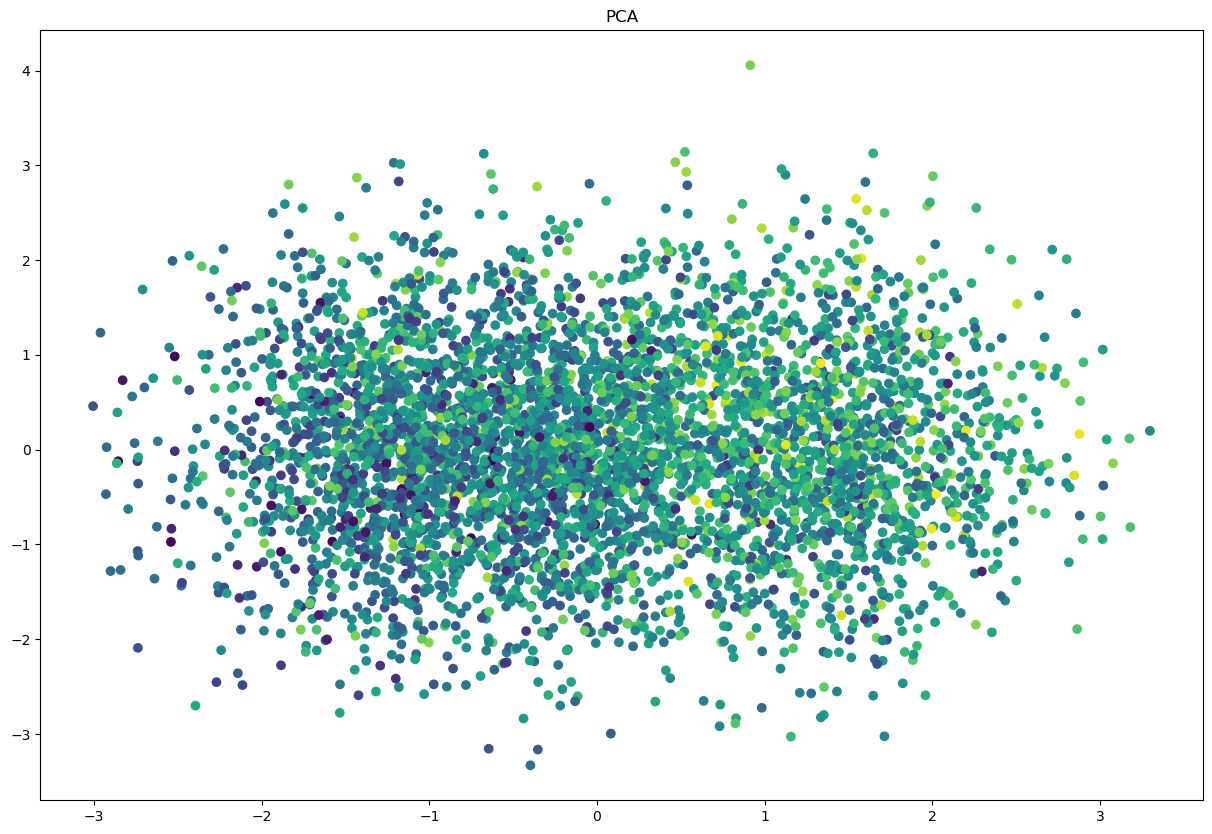

In [96]:
fig, ax = plt.subplots()
ax.scatter(pca_df['first'], pca_df['second'], c=pca_df['label'])
ax.set_title('PCA')
plt.savefig('gráficas/pca.png')
plt.show()

## Selección de variable

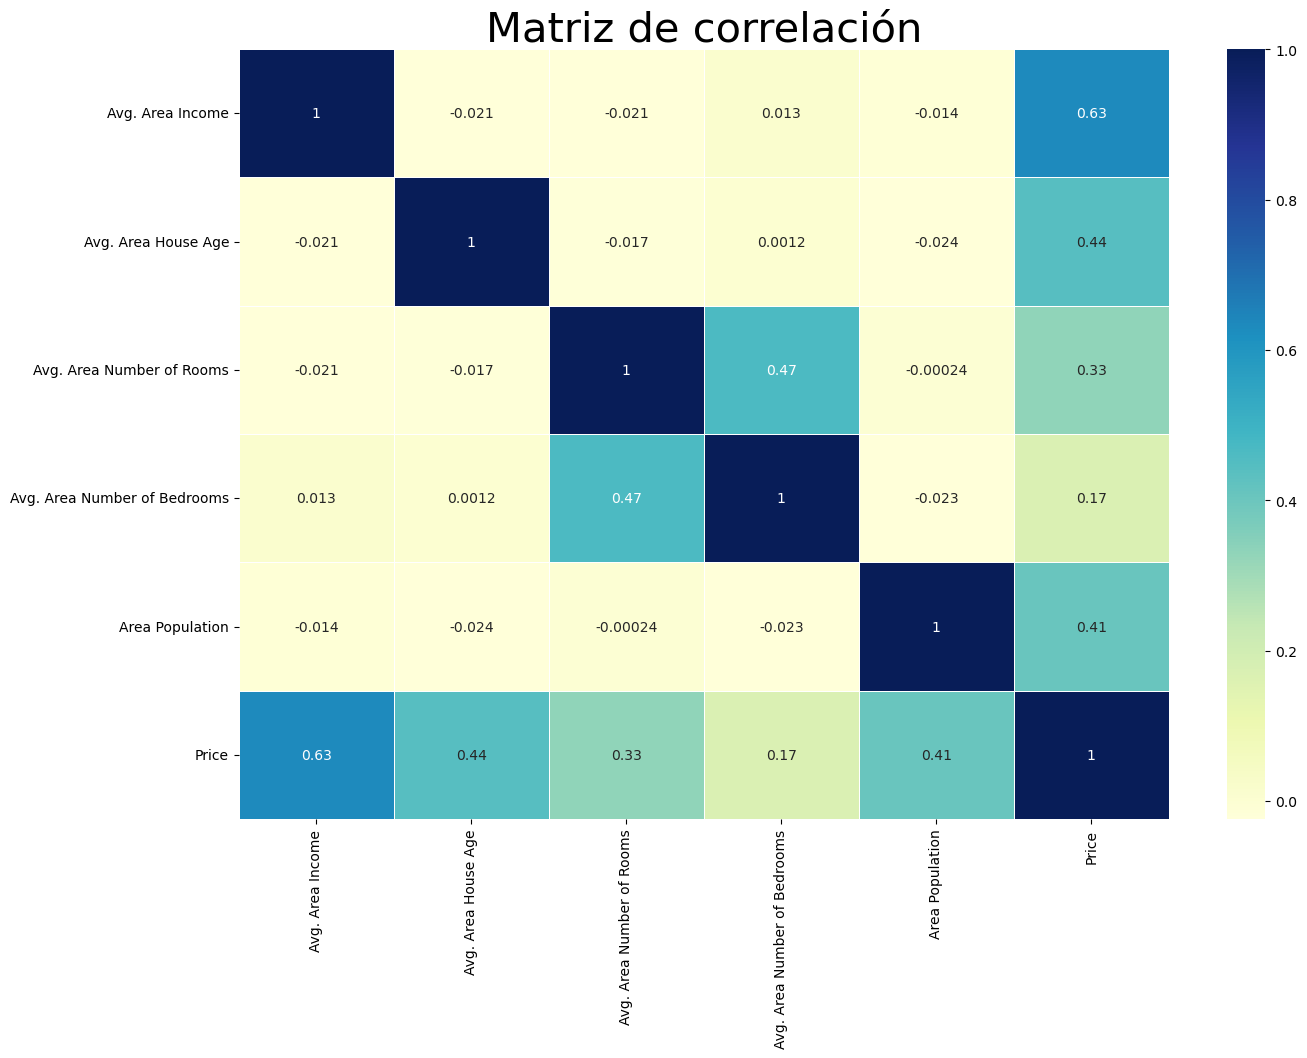

In [100]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df_housing_f1.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Matriz de correlación', fontsize = 30)
plt.savefig('gráficas/matriz_correlación.png')
plt.show()

Al analizar esta matriz de correlación podemos observar lo siguiente:
- Avg. Area Income obtiene una correlación positiva con la variable Price, indicando que a medida que el ingreso promeido del área aumenta, el precio también (Relación entre ambas variables).
- Avg. Area House Age le pasa lo mismo que en el anterior caso, este obtiene relación con la variable Price, indicando que cuando aumenta el promedio de edad en casas el precio también.
- Avg. Area Number of Rooms igual contiene relación con la variable Price, cuantas mas habitaciones tenga la casa, mas cara es. También obtiene realción positiva con Avg. Area Number of Bedrooms teniendo ambas relación, implica que a medida que el promedio de habitaciones aumenta, tambien tiende a aumentar el promedio de dormitorios.
- Avg. Area Number of Bedrooms contiene como ya dijimos antes con Avg. Area Number of Rooms pero también con Price.
- Area Population con Price tienen una corelación postiva haciendo que estén relacionadas entre ellas.

## Graficación de datos

Primero analizaremos cada variable respecto a Price.

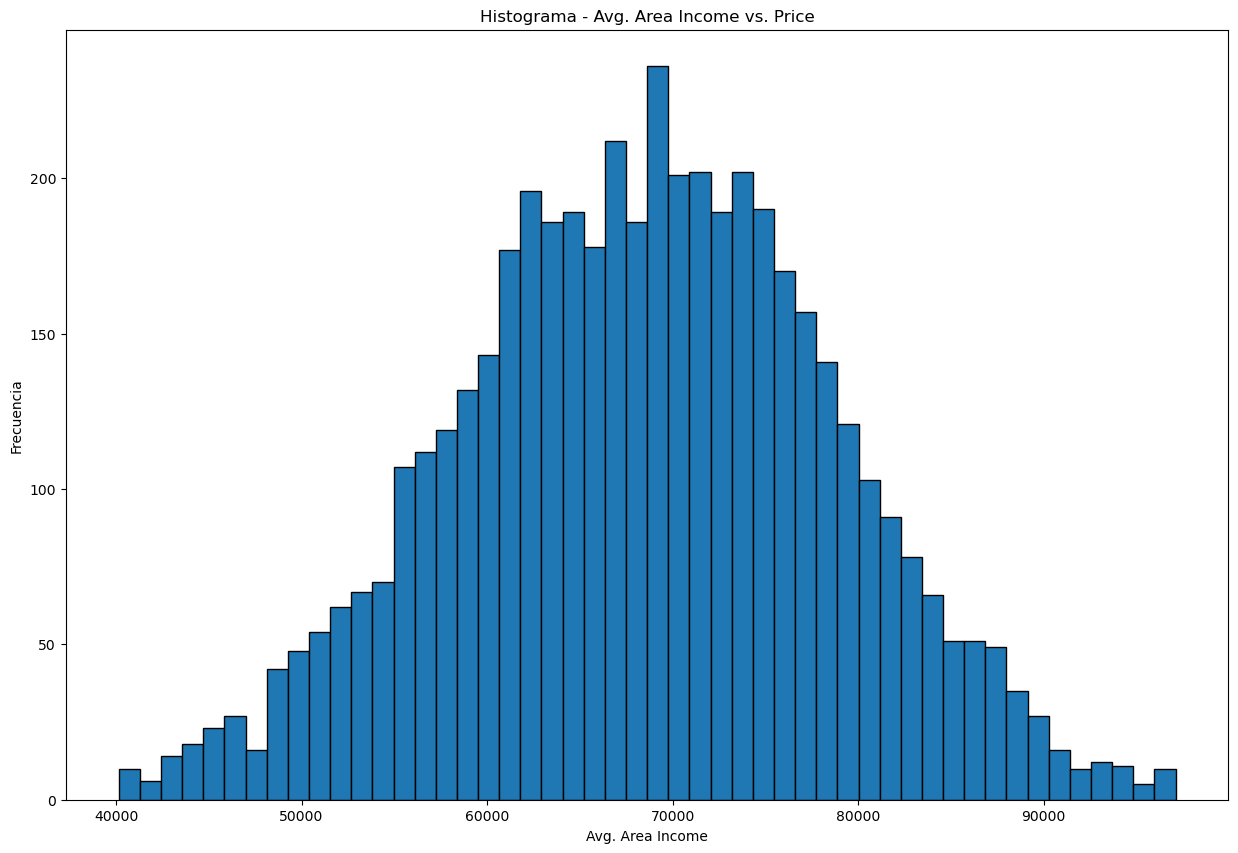

In [123]:
plt.hist(df_housing_f1[df_housing_f1['Price']< 2000000]['Avg. Area Income'], bins=50, edgecolor='black') #bins = número de barras
plt.xlabel('Avg. Area Income')
plt.ylabel('Frecuencia')
plt.title('Histograma - Avg. Area Income vs. Price')
plt.show()

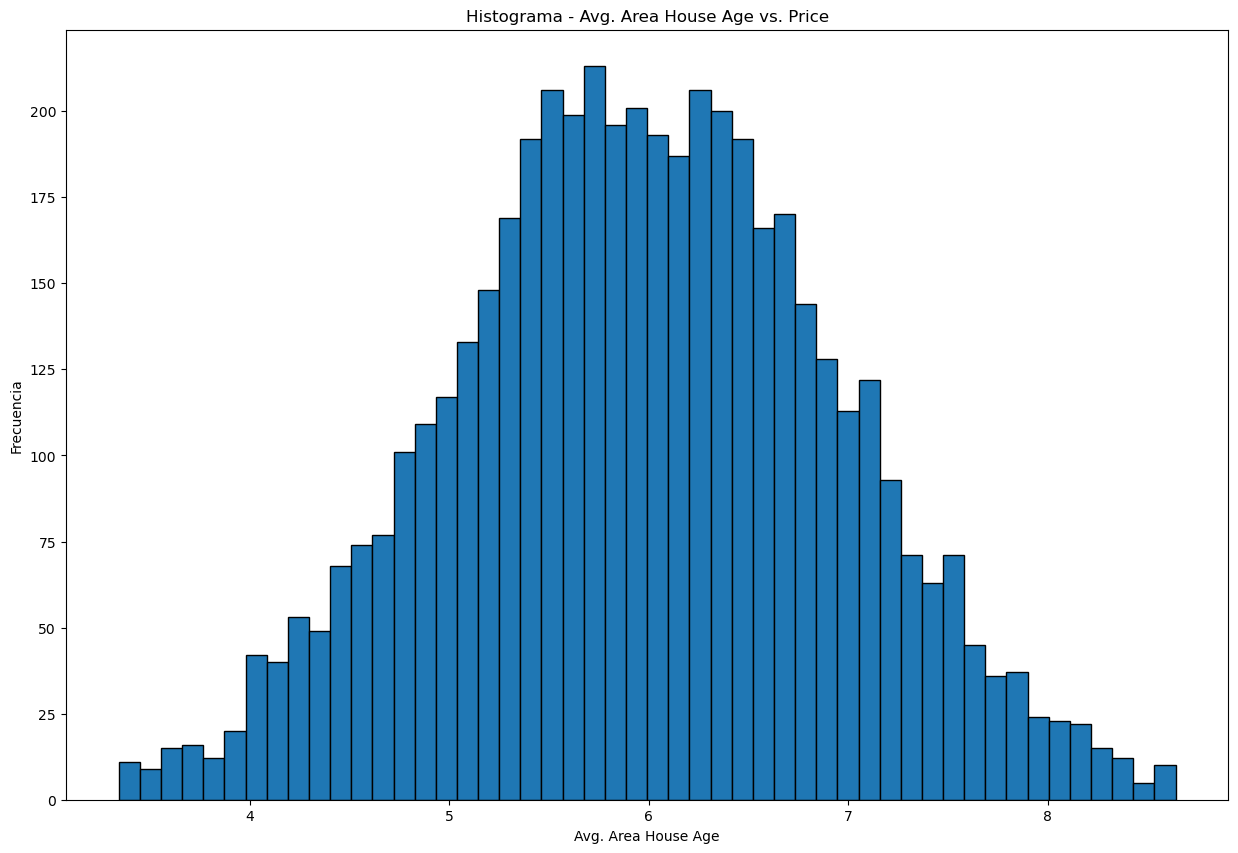

In [122]:
plt.hist(df_housing_f1[df_housing_f1['Price'] < 2000000]['Avg. Area House Age'], bins=50, edgecolor='black')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Frecuencia')
plt.title('Histograma - Avg. Area House Age vs. Price')
plt.show()

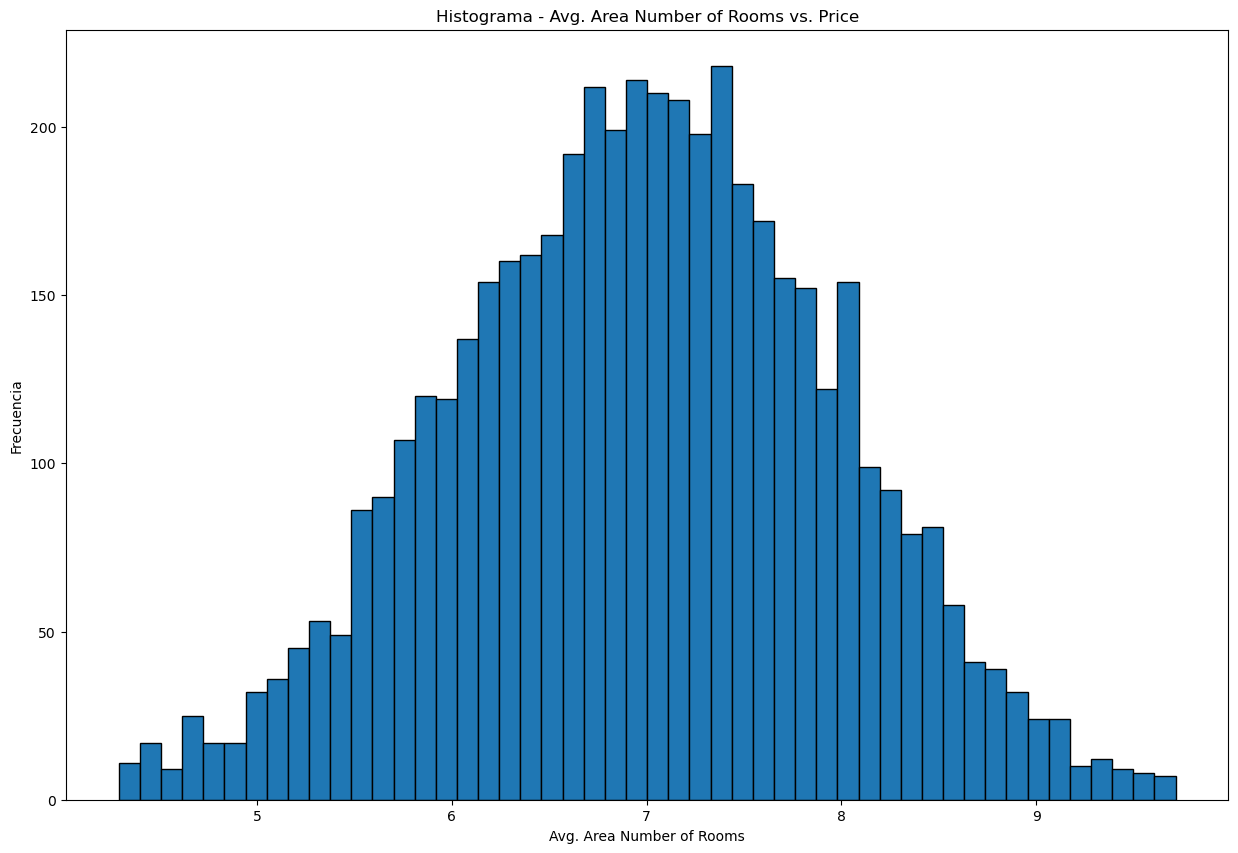

In [121]:
plt.hist(df_housing_f1[df_housing_f1['Price'] < 2000000]['Avg. Area Number of Rooms'], bins=50, edgecolor='black')
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Frecuencia')
plt.title('Histograma - Avg. Area Number of Rooms vs. Price')
plt.show()

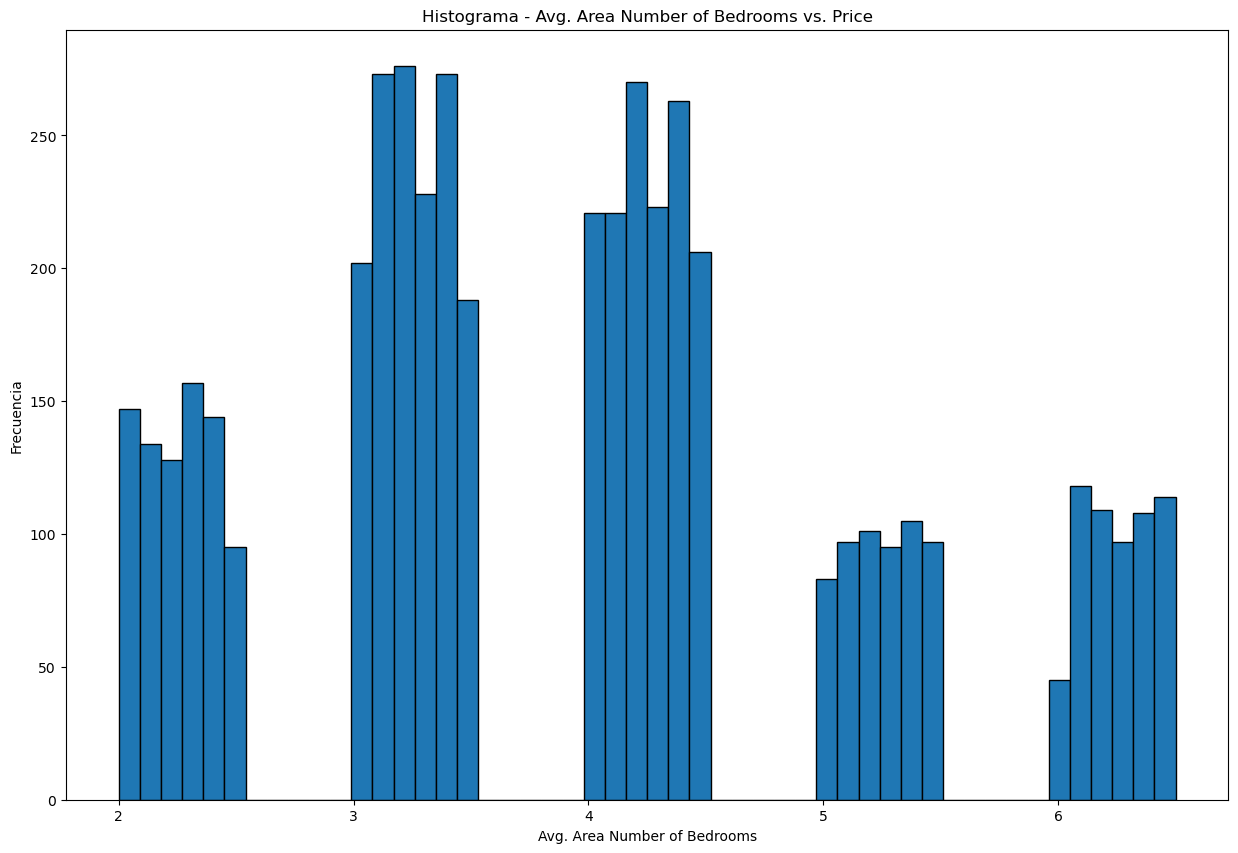

In [120]:
plt.hist(df_housing_f1[df_housing_f1['Price'] < 2000000]['Avg. Area Number of Bedrooms'], bins=50, edgecolor='black')
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Frecuencia')
plt.title('Histograma - Avg. Area Number of Bedrooms vs. Price')
plt.show()

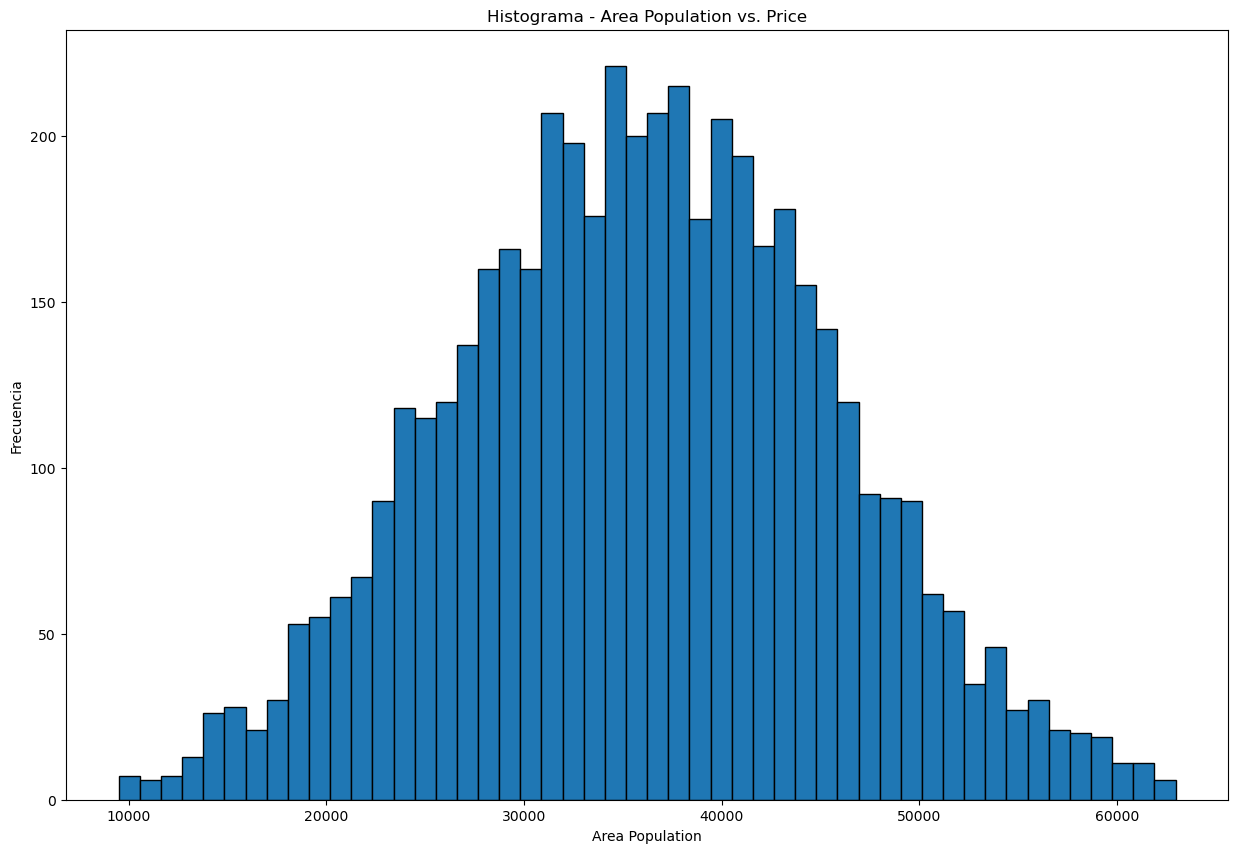

In [119]:
plt.hist(df_housing_f1[df_housing_f1['Price'] < 2000000]['Area Population'], bins=50, edgecolor='black')
plt.xlabel('Area Population')
plt.ylabel('Frecuencia')
plt.title('Histograma - Area Population vs. Price')
plt.show()

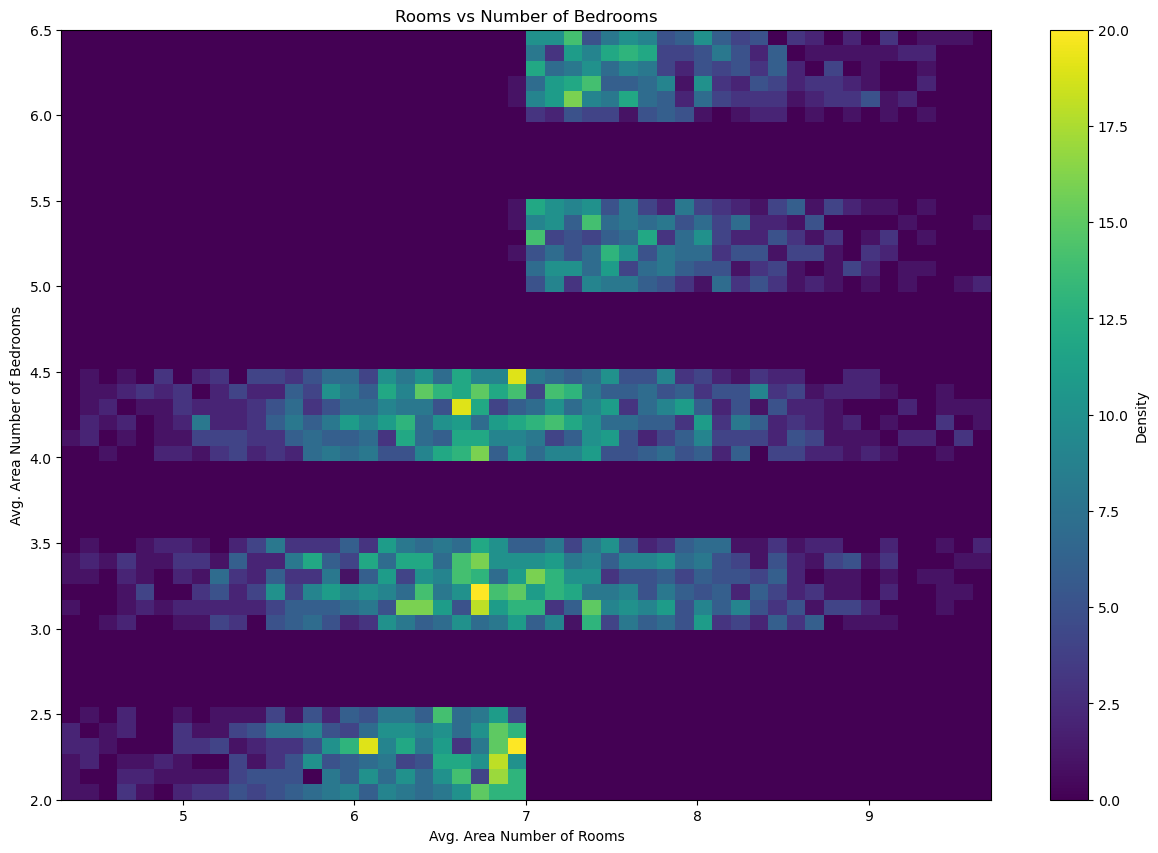

In [130]:
plt.hist2d(df_housing_f1['Avg. Area Number of Rooms'], df_housing_f1['Avg. Area Number of Bedrooms'], bins=50, cmap='viridis')

plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Avg. Area Number of Bedrooms')
plt.title('Número de habitaciones vs Número de dormitorios')

plt.colorbar(label='Density')
plt.show()
